<a href="https://colab.research.google.com/github/ramon-santana-silva/miniprojeto01/blob/main/roofimoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Mini Projeto Roof Imóveis </h1>

<h1>CONTEXTO</h1>
Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, uma consultoria estratégica permitirá investir em imóveis no Condado de County, nos Estados
Unidos.
<h1>OBJETIVO</h1>
Construir um modelo que permite a "Roof Imóveis" identificar os 5 imóveis melhores para investir e quais o 5 imóveis que não deveria investir de forma alguma.

In [1]:
#bibliotecas de manipulação de dados 
!pip install pandas 
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sidetable
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importação das bibliotecas
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sidetable as stb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error

O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

<h2>Extração/ Obtenção de dados</h2>
As bases de dados foram retiradas do site: https://www.kaggle.com/harlfoxem/housesalesprediction e https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/ e dataset extraidos do repositorio Github :'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv' e 'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'

In [3]:
#extraindo dataframe
DATA_URL ='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv'     
#convertendo objeto para data parse_dates
roof_df= pd.read_csv(DATA_URL,sep=',',parse_dates=["date"])


<h1>Informação das colunas do dataframe roof_df</h1>
                             

*   id - Identiﬁcador único do imóvel 
*   view - Grau de quão belo é a vista do imóvel (0 a 4)
*   date - Data da Venda
*   condition - Condição da casa (1 a 5)
*   price - Preço de venda
*   grade - Classiﬁcação por qualidade de material utilizado na
construção
*   bedrooms - Nº de Quartos
*   bathrooms - Nº de Banheiros 
*   sqft_above - Área em acima do solo em ft²
*   sqft_liv - Tamanho de área habitável em ft²sqft_basmtÁrea em abaixo do solo em ft²
*   sqft_lot - Tamanho do terreno em ft²
*   yr_built - Ano de construção
*   ﬂoors - Número de andares
*   yr_renov - Ano de restauração, caso o contrário, 0.
*   zipcode - Zip Code 5 - Similar ao CEP
*   waterfront - Indicativo se o imóvel é a beira-mar
*   lat - Latitude
*   long - Longitude
*   squft_liv15 - Média da área habitável dos 15 imóveis mais próximos,
em ft²
*   squft_lot15 - Média da área do lote dos 15 imóveis mais próximos,
em ft²













In [4]:
#extraindo dataframe zipcode_df
DATA_URL2='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'
zipcode_df=pd.read_csv(DATA_URL2 , sep=",", encoding='UTF-8')



<h1>Informação das colunas do dataframe zipcode_df</h1>

*  OBJECTID -	Código ID
*  zipcode - Zip Code 5 - Similar ao CEP
*  COUNTY - Código do municipio
*  COUNTY	County code
*  ZIP_TYPE -	tipo de zipcode: padrão ou caixa postal
*  Shape_Leng -	comprimento poligonal
*  Shape_Area -	aréa poligonal








<h2>Limpeza dos Dataframes roof_df e zipcode_df </h2>
Para uma analise mais clara e objetiva serão excluidas algumas colunas que não são necessarias nesse modelo de previsão de dados


*   Tipo de colunas como:
1.   Dados repedidos ou similares
2.   Ids desnecessarios
3.   Tipo de zipcode

*   Filtrar por informações  alvo do projeto








In [5]:
#zipcode_df sendo reduzido atraves da criação de novo dataframe somente com o municipio de King County alvo do projeto
zipKingCounty_df= zipcode_df[(zipcode_df.COUNTY == 33)]
zipKingCounty_df

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,148134.771476,5.261214e+08
1,2,98002,98002,33,Standard,King County,AUBURN,105168.476823,2.044452e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,121645.069928,3.169812e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,108801.063326,2.014512e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116930.354131,2.112733e+08
...,...,...,...,...,...,...,...,...,...
100,101,98199,98199,33,Standard,King County,SEATTLE,56408.722420,1.132192e+08
108,109,98224,98224,33,PO Box,King County,BARING,187335.039773,1.720745e+09
118,119,98288,98288,33,PO Box,King County,SKYKOMISH,484891.351634,8.749464e+09
147,148,98354,98354,33,Standard,King County,MILTON,25310.379574,1.500487e+07


In [6]:
#identificando valores únicos do dataframe zipKingCounty_df
zipKingCounty_df.nunique()

OBJECTID          87
ZIP               87
ZIPCODE           87
COUNTY             1
ZIP_TYPE           2
COUNTY_NAME        1
PREFERRED_CITY    33
Shape_Length      87
Shape_Area        87
dtype: int64

In [7]:
# Verificando o cabeçalho
roof_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Verificando informações do dataset
roof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        209 non-null    int64  
 1   ZIP             209 non-null    int64  
 2   ZIPCODE         209 non-null    int64  
 3   COUNTY          209 non-null    int64  
 4   ZIP_TYPE        209 non-null    object 
 5   COUNTY_NAME     209 non-null    object 
 6   PREFERRED_CITY  209 non-null    object 
 7   Shape_Length    209 non-null    float64
 8   Shape_Area      209 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 14.8+ KB


In [10]:
# Verificando quantos dados nulos há
roof_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#verificando quantos dados nulos há
zipcode_df.isnull().sum()

OBJECTID          0
ZIP               0
ZIPCODE           0
COUNTY            0
ZIP_TYPE          0
COUNTY_NAME       0
PREFERRED_CITY    0
Shape_Length      0
Shape_Area        0
dtype: int64

In [72]:
#unindo os datasets roof_df e zipcode_df
df=pd.merge(roof_df, zipcode_df, left_on='zipcode', right_on='ZIPCODE', how='left').drop('ZIPCODE',axis=1).drop('COUNTY',axis=1).drop('ZIP_TYPE',axis=1).drop('COUNTY_NAME',axis=1)  
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,97,98178,SEATTLE,67151.963868,1.353411e+08
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,81,98125,SEATTLE,66923.859716,1.496818e+08
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,24,98028,KENMORE,75146.222022,1.732332e+08
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,85,98136,SEATTLE,52855.048472,6.318620e+07
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,56,98074,SAMMAMISH,115554.667658,3.277498e+08


In [73]:
#identificando valores únicos do dataframe df
df['id'].nunique()

21436

In [70]:
df.shape

(23309, 21)

<h1> Analise dos ids dos imóveis vs quantidade de vezes vendida</h1>


---


O imóvel de id 7701960990 da cidade WOODINVILLE tem as seguintes caracteristicas:<br>
*   liquidez de venda do dia 16-06-2014 a 19-08-2014 (aproximadamente de 2 meses) com uma retabilidade de 0.92%
Price: 870000
Media de preço de WOODINVILLE: 671384
N° quartos:04
Media de N° quartos de WOODINVILLE:3.5
Grade:11
Media de grade de WOODINVILLE:8

O imóvel de id 3303000130 da cidade SEATTLE tem as seguintes caracteristicas:<br>
*   liquidez de venda do dia 16-01-2015 a 28-04-2015(aproximadamente 3.5 meses)	 com uma retabilidade de 40.54% e valor abaixo do valor da media da cidade.
Price:520000.00
Media de preço de SEATTLE:538864.49 
N° quartos:3
Media de N° quartos de SEATTLE:3
Grade:8
Media de grade de SEATTLE:7

O imóvel de id 526059224 da cidade BOTHELL tem as seguintes caracteristicas:<br> 
*   liquidez de venda do dia 23-09-2014 a 06-02-2015(aproximadamente 4.5 meses)	 com uma retabilidade de 80,77%
Price:470000.0
Media de preço de BOTHELL:490351.46 
N° quartos:4
Media de N° quartos de BOTHELL:3.5
Grade:7
Media de grade de BOTHELL:7

O imóvel de id 1630700361 da cidade WOODINVILLE tem as seguintes caracteristicas:<br> 
*   liquidez de venda do dia 27-06-2014 a 09-04-2015(aproximadamente 10 meses)	 com uma retabilidade de 10,09%
Price:583500 
Media de preço de WOODINVILLE: 671384
N° quartos:04
Media de N° quartos de WOODINVILLE:3.5
Grade:8
Media de grade de WOODINVILLE:8

O imóvel de id 9238500040 da cidade WOODINVILLE tem as seguintes caracteristicas:<br> 
*   liquidez de venda do dia 24-06-2014 a 	10-02-2015(aproximadamente 8 meses)	 com uma retabilidade de 49,75%
Price: 599000
Media de preço de WOODINVILLE: 671384
N° quartos:03
Media de N° quartos de WOODINVILLE:3.5
Grade:7
Media de grade de WOODINVILLE:8

O imóvel de id 795000620 da cidade SEATTLE tem as seguintes caracteristicas:<br> 
*   liquidez de venda do dia 15-12-2014 a 	11-03-2015(aproximadamente 4 meses)	 com uma retabilidade de 26,61%
Price:157000.0
Media de preço de SEATTLE:538864.49 
N° quartos:
Media de N° quartos de SEATTLE:3
Grade:5
Media de grade de SEATTLE:7


In [74]:
df[df['PREFERRED_CITY']=='SEATTLE'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,9.232000e+03,9.232000e+03,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,...,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9.232000e+03
mean,4.584788e+09,5.388645e+05,3.175693,1.899561,1809.837847,6604.978878,1.456131,0.008016,0.317049,3.439991,...,125.619476,98134.830914,47.616988,-122.333470,1696.784554,6333.255091,81.346187,98134.830914,71194.463087,1.354713e+08
std,2.845929e+09,3.439932e+05,1.035447,0.789605,811.310161,5689.025612,0.586355,0.089175,0.879292,0.701049,...,484.775680,28.671485,0.097285,0.041027,510.478926,4740.704226,10.543510,28.671485,21310.603612,5.624685e+07
min,1.200019e+06,7.800000e+04,0.000000,0.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,98102.000000,47.342900,-122.416000,460.000000,651.000000,64.000000,98102.000000,5897.646683,1.716365e+06
25%,2.126049e+09,3.400000e+05,3.000000,1.000000,1250.000000,4000.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,98115.000000,47.540500,-122.368000,1350.000000,4005.000000,74.000000,98115.000000,55894.191555,9.249711e+07
50%,4.019300e+09,4.560750e+05,3.000000,1.750000,1650.000000,5720.500000,1.000000,0.000000,0.000000,3.000000,...,0.000000,98125.000000,47.638200,-122.336000,1590.000000,5700.000000,81.000000,98125.000000,72017.644679,1.439973e+08
75%,7.234601e+09,6.350000e+05,4.000000,2.500000,2200.000000,7980.000000,2.000000,0.000000,0.000000,4.000000,...,0.000000,98155.000000,47.691600,-122.299000,1930.000000,7830.000000,90.000000,98155.000000,84971.313801,1.813174e+08
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,137214.000000,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-122.220000,4950.000000,128066.000000,101.000000,98199.000000,120954.750650,2.589595e+08


In [75]:
df[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
19022,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,94,98168,SEATTLE,105513.044308,2.589595e+08
19023,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,94,98168,SEATTLE,105513.044308,2.589595e+08
19024,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,94,98168,SEATTLE,105513.044308,2.589595e+08


In [76]:
df[df['PREFERRED_CITY']=='WOODINVILLE'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,9.420000e+02,9.420000e+02,942.00000,942.000000,942.000000,942.000000,942.000000,942.0,942.000000,942.000000,...,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,9.420000e+02
mean,3.725080e+09,6.173845e+05,3.52017,2.336518,2575.715499,40882.668790,1.542463,0.0,0.038217,3.324841,...,46.375796,98074.101911,47.748875,-122.102223,2535.562633,33020.301486,56.181529,98074.101911,92245.994170,2.549102e+08
std,3.101623e+09,2.438920e+05,0.70757,0.698278,1001.085952,48171.163514,0.490398,0.0,0.296319,0.520156,...,300.067589,2.469413,0.016381,0.043501,771.758451,33523.980024,2.037887,2.469413,27652.332736,1.390267e+08
min,1.260590e+08,2.000000e+05,1.00000,0.750000,770.000000,2500.000000,1.000000,0.0,0.000000,2.000000,...,0.000000,98072.000000,47.707300,-122.175000,1120.000000,2426.000000,54.000000,98072.000000,50110.124003,7.592607e+07
25%,1.425323e+09,4.412500e+05,3.00000,2.000000,1872.500000,11222.750000,1.000000,0.0,0.000000,3.000000,...,0.000000,98072.000000,47.737625,-122.139000,1970.000000,10299.000000,54.000000,98072.000000,78248.234396,1.513442e+08
50%,1.926069e+09,5.700000e+05,3.00000,2.500000,2460.000000,32496.000000,2.000000,0.0,0.000000,3.000000,...,0.000000,98072.000000,47.748200,-122.097000,2510.000000,33447.000000,55.000000,98072.000000,97654.664902,2.600431e+08
75%,7.214710e+09,7.521438e+05,4.00000,2.500000,3130.000000,46635.250000,2.000000,0.0,0.000000,4.000000,...,0.000000,98077.000000,47.762800,-122.072000,3095.000000,41649.250000,58.000000,98077.000000,118806.069869,3.687420e+08
max,9.562200e+09,1.920000e+06,6.00000,5.750000,7730.000000,368517.000000,2.500000,0.0,3.000000,5.000000,...,2007.000000,98077.000000,47.775900,-122.012000,5600.000000,266587.000000,59.000000,98077.000000,118806.069869,4.197400e+08


In [77]:
df[df['id']==7701960990].drop_duplicates(subset=['date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
12298,7701960990,2014-06-16,862000.0,4,2.5,3190,14565,2.0,0,0,...,98077,47.713,-122.072,3420,20475,58,98077,WOODINVILLE,117061.095408,4.197400e+08
12300,7701960990,2014-08-19,870000.0,4,2.5,3190,14565,2.0,0,0,...,98077,47.713,-122.072,3420,20475,58,98077,WOODINVILLE,117061.095408,4.197400e+08


In [78]:
df[df['id']==3303000130].drop_duplicates(subset=['date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
5660,3303000130,2015-01-16,370000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,95,98177,SEATTLE,95410.398542,1.595630e+08
5662,3303000130,2015-04-28,520000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,95,98177,SEATTLE,95410.398542,1.595630e+08


In [79]:
df[df['PREFERRED_CITY']=='BOTHELL'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,3.900000e+02,3.900000e+02,390.000000,390.000000,390.000000,390.000000,390.000000,390.0,390.000000,390.000000,...,390.000000,390.0,390.000000,390.000000,390.000000,390.000000,390.000000,390.0,390.000000,3.900000e+02
mean,4.284961e+09,4.903515e+05,3.548718,2.278205,2253.097436,11314.138462,1.502564,0.0,0.061538,3.220513,...,50.810256,98011.0,47.755192,-122.201174,2248.076923,9512.087179,10.500000,98011.0,38095.434325,9.900015e+07
std,3.009674e+09,1.216899e+05,0.849277,0.528591,711.696605,16105.409243,0.490258,0.0,0.437694,0.524554,...,313.633142,0.0,0.014577,0.016690,544.388073,5050.528075,0.500642,0.0,35430.197583,9.897684e+07
min,2.005004e+08,2.455000e+05,1.000000,1.000000,790.000000,2801.000000,1.000000,0.0,0.000000,1.000000,...,0.000000,98011.0,47.726400,-122.237000,1080.000000,2723.000000,10.000000,98011.0,2710.689228,1.502838e+05
25%,1.387300e+09,4.121000e+05,3.000000,1.812500,1700.000000,7279.000000,1.000000,0.0,0.000000,3.000000,...,0.000000,98011.0,47.740725,-122.215000,1890.000000,7572.250000,10.000000,98011.0,2710.689228,1.502838e+05
50%,4.178600e+09,4.700000e+05,3.000000,2.500000,2200.000000,8947.000000,1.500000,0.0,0.000000,3.000000,...,0.000000,98011.0,47.755700,-122.202000,2160.000000,8970.000000,10.500000,98011.0,38095.434325,9.900015e+07
75%,6.779900e+09,5.500000e+05,4.000000,2.500000,2660.000000,10667.750000,2.000000,0.0,0.000000,3.000000,...,0.000000,98011.0,47.769175,-122.194000,2575.000000,10220.250000,11.000000,98011.0,73480.179423,1.978500e+08
max,9.567800e+09,1.075000e+06,6.000000,3.500000,4890.000000,209959.000000,2.000000,0.0,4.000000,5.000000,...,1998.000000,98011.0,47.776300,-122.167000,4590.000000,56628.000000,11.000000,98011.0,73480.179423,1.978500e+08


In [80]:
df[df['id']==526059224].drop_duplicates(subset=['date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
7757,526059224,2014-09-23,260000.0,4,1.75,1650,7276,1.0,0,0,...,98011,47.7721,-122.206,1840,8550,10,98011,BOTHELL,73480.179423,1.978500e+08
7759,526059224,2015-02-06,470000.0,4,1.75,1650,7276,1.0,0,0,...,98011,47.7721,-122.206,1840,8550,10,98011,BOTHELL,73480.179423,1.978500e+08


In [81]:
df[df['id']==1630700361].drop_duplicates(subset=['date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
19193,1630700361,2014-06-27,530000.0,4,1.75,2860,48351,1.0,0,0,...,98077,47.7605,-122.085,2460,43560,58,98077,WOODINVILLE,117061.095408,4.197400e+08
19195,1630700361,2015-04-09,583500.0,4,1.75,2860,48351,1.0,0,0,...,98077,47.7605,-122.085,2460,43560,58,98077,WOODINVILLE,117061.095408,4.197400e+08


In [82]:
df[df['id']==9238500040].drop_duplicates(subset=['date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
13876,9238500040,2014-06-24,400000.0,3,2.5,2970,23100,1.0,0,0,...,98072,47.7735,-122.133,2390,20300,54,98072,WOODINVILLE,118806.069869,3.687420e+08
13878,9238500040,2015-02-10,599000.0,3,2.5,2970,23100,1.0,0,0,...,98072,47.7735,-122.133,2390,20300,54,98072,WOODINVILLE,118806.069869,3.687420e+08


<h1> Gráfico de Barra id dos imóveis vs quantidade frequência de interesse</h1>


---


O imóvel de id 1523300157 da cidade SEATTLE que está no gráfico tem as seguintes caracteristicas que mostra desvantagens:<br>
*   liquidez de venda do dia 15-10-2014<br>
Price:325000.0
Media de preço de SEATTLE:538864.49 
N° quartos:2
Media de N° quartos de SEATTLE:3
Grade:7
Media de grade de SEATTLE:7

O imóvel de id 9324800180 da cidade SEATTLE que está no gráfico tem as seguintes caracteristicas:<br>
Price:403250.0	
Media de preço de SEATTLE:538864.49 
N° quartos:2
Media de N° quartos de SEATTLE:3
Grade:7
Media de grade de SEATTLE:7

O imóvel de id 7853220690 da cidade SNOQUALMIE	 que está no gráfico tem as seguintes caracteristicas:<br> 

Price:470000.0	
Media de preço de SNOQUALMIE:403250.0
N° quartos:3
Media de N° quartos de SNOQUALMIE:3.5
Grade:8
Media de grade de SNOQUALMIE:7.8

O imóvel de id 1545803980 da cidade MAPLE VALLEY  que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
*  quantidade de banheiro é 1 sendo abaixo da media
Price:239000.0
Media de preço de MAPLE VALLEY:366867.6
N° quartos:3
Media de N° quartos de MAPLE VALLEY:3.5
Grade:7
Media de grade de MAPLE VALLEY:7

O imóvel de id 2484700015  da cidade SEATTLE que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
Price:579000.0
Media de preço de SEATTLE:538864.49 
N° quartos:1.5
Media de N° quartos de SEATTLE:3
Grade:8
Media de grade de SEATTLE:7

In [83]:
id_counts=df['id'].value_counts()
id_counts=id_counts.tail(20)

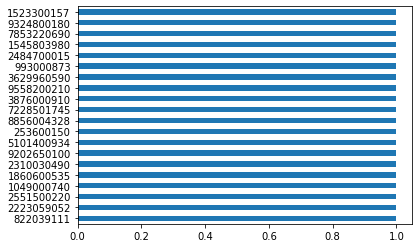

In [84]:
id_counts.plot.barh();

In [85]:
df[df['id']==1523300157] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
23308,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,98144,47.5941,-122.299,1020,1357,86,98144,SEATTLE,52220.909682,9.249711e+07


In [86]:
df[df['id']==9324800180] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
8131,9324800180,2014-10-16,403250.0,2,1.5,1430,8137,1.0,0,0,...,98125,47.7307,-122.29,1430,8137,81,98125,SEATTLE,66923.859716,1.496818e+08


In [57]:
df[df['PREFERRED_CITY']=='SNOQUALMIE'].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,Shape_Length,Shape_Area,month,year
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,3.100000e+02,3.100000e+02,310.000000,310.000000
mean,5.279612e+05,3.522581,2.545161,2571.322581,17065.183871,1.879032,0.0,0.290323,3.045161,7.858065,2455.612903,115.709677,1997.132258,38.409677,47.531730,-121.861929,3.457175e+05,2.404509e+09,6.200000,2014.358065
std,1.856245e+05,0.853968,0.676687,924.219530,65420.399425,0.310098,0.0,0.843538,0.286524,1.217131,784.422434,338.200042,22.267103,273.853639,0.009233,0.028177,5.830177e-11,4.776081e-07,2.963423,0.480206
min,1.700000e+05,0.000000,0.000000,480.000000,2513.000000,1.000000,0.0,0.000000,1.000000,5.000000,480.000000,0.000000,1900.000000,0.000000,47.512400,-121.890000,3.457175e+05,2.404509e+09,1.000000,2014.000000
25%,4.249625e+05,3.000000,2.500000,1950.000000,4906.500000,2.000000,0.0,0.000000,3.000000,7.000000,1950.000000,0.000000,2000.000000,0.000000,47.524425,-121.878000,3.457175e+05,2.404509e+09,4.000000,2014.000000
50%,5.000000e+05,4.000000,2.500000,2445.000000,6192.500000,2.000000,0.0,0.000000,3.000000,8.000000,2430.000000,0.000000,2004.000000,0.000000,47.533600,-121.870000,3.457175e+05,2.404509e+09,6.000000,2014.000000
75%,6.183000e+05,4.000000,2.750000,3107.500000,8492.000000,2.000000,0.0,0.000000,3.000000,9.000000,2910.000000,0.000000,2007.000000,0.000000,47.538475,-121.855250,3.457175e+05,2.404509e+09,9.000000,2015.000000
max,1.998000e+06,6.000000,5.500000,7350.000000,920423.000000,2.000000,0.0,4.000000,5.000000,12.000000,5190.000000,2600.000000,2015.000000,2000.000000,47.572900,-121.676000,3.457175e+05,2.404509e+09,12.000000,2015.000000


In [87]:
df[df['id']==7853220690]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
8132,7853220690,2014-09-12,470000.0,3,2.5,2280,6134,2.0,0,0,...,98065,47.5335,-121.854,2640,6167,50,98065,SNOQUALMIE,345717.47207,2.404509e+09


In [88]:
df[df['id']==1545803980]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
8133,1545803980,2015-04-25,239000.0,3,1.0,1200,7810,1.0,0,0,...,98038,47.3631,-122.05,1590,7800,33,98038,MAPLE VALLEY,315896.766091,1.649766e+09


In [ ]:
df[df['id']==2484700015]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
8134,2484700015,2015-03-27,579000.0,4,1.5,2480,6000,1.0,0,0,...,98136,47.5233,-122.386,1810,6000,85,98136,SEATTLE,52855.048472,6.318620e+07


In [ ]:
df[df['PREFERRED_CITY']=='SEATTLE'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,9.232000e+03,9.232000e+03,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,...,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9.232000e+03
mean,4.584788e+09,5.388645e+05,3.175693,1.899561,1809.837847,6604.978878,1.456131,0.008016,0.317049,3.439991,...,125.619476,98134.830914,47.616988,-122.333470,1696.784554,6333.255091,81.346187,98134.830914,71194.463087,1.354713e+08
std,2.845929e+09,3.439932e+05,1.035447,0.789605,811.310161,5689.025612,0.586355,0.089175,0.879292,0.701049,...,484.775680,28.671485,0.097285,0.041027,510.478926,4740.704226,10.543510,28.671485,21310.603612,5.624685e+07
min,1.200019e+06,7.800000e+04,0.000000,0.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,98102.000000,47.342900,-122.416000,460.000000,651.000000,64.000000,98102.000000,5897.646683,1.716365e+06
25%,2.126049e+09,3.400000e+05,3.000000,1.000000,1250.000000,4000.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,98115.000000,47.540500,-122.368000,1350.000000,4005.000000,74.000000,98115.000000,55894.191555,9.249711e+07
50%,4.019300e+09,4.560750e+05,3.000000,1.750000,1650.000000,5720.500000,1.000000,0.000000,0.000000,3.000000,...,0.000000,98125.000000,47.638200,-122.336000,1590.000000,5700.000000,81.000000,98125.000000,72017.644679,1.439973e+08
75%,7.234601e+09,6.350000e+05,4.000000,2.500000,2200.000000,7980.000000,2.000000,0.000000,0.000000,4.000000,...,0.000000,98155.000000,47.691600,-122.299000,1930.000000,7830.000000,90.000000,98155.000000,84971.313801,1.813174e+08
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,137214.000000,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-122.220000,4950.000000,128066.000000,101.000000,98199.000000,120954.750650,2.589595e+08


In [24]:
df[df['PREFERRED_CITY']=='SNOQUALMIE'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,3.100000e+02,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.0,310.000000,310.000000,...,310.000000,310.0,310.000000,310.000000,310.000000,310.000000,310.0,310.0,3.100000e+02,3.100000e+02
mean,7.393758e+09,5.279612e+05,3.522581,2.545161,2571.322581,17065.183871,1.879032,0.0,0.290323,3.045161,...,38.409677,98065.0,47.531730,-121.861929,2518.274194,11241.748387,50.0,98065.0,3.457175e+05,2.404509e+09
std,1.412830e+09,1.856245e+05,0.853968,0.676687,924.219530,65420.399425,0.310098,0.0,0.843538,0.286524,...,273.853639,0.0,0.009233,0.028177,768.796819,31210.379480,0.0,0.0,5.830177e-11,4.776081e-07
min,1.230790e+08,1.700000e+05,0.000000,0.000000,480.000000,2513.000000,1.000000,0.0,0.000000,1.000000,...,0.000000,98065.0,47.512400,-121.890000,890.000000,2335.000000,50.0,98065.0,3.457175e+05,2.404509e+09
25%,7.852020e+09,4.249625e+05,3.000000,2.500000,1950.000000,4906.500000,2.000000,0.0,0.000000,3.000000,...,0.000000,98065.0,47.524425,-121.878000,1970.000000,5000.000000,50.0,98065.0,3.457175e+05,2.404509e+09
50%,7.852181e+09,5.000000e+05,4.000000,2.500000,2445.000000,6192.500000,2.000000,0.0,0.000000,3.000000,...,0.000000,98065.0,47.533600,-121.870000,2440.000000,5900.000000,50.0,98065.0,3.457175e+05,2.404509e+09
75%,7.853302e+09,6.183000e+05,4.000000,2.750000,3107.500000,8492.000000,2.000000,0.0,0.000000,3.000000,...,0.000000,98065.0,47.538475,-121.855250,2950.000000,7530.250000,50.0,98065.0,3.457175e+05,2.404509e+09
max,9.474700e+09,1.998000e+06,6.000000,5.500000,7350.000000,920423.000000,2.000000,0.0,4.000000,5.000000,...,2000.000000,98065.0,47.572900,-121.676000,5380.000000,411962.000000,50.0,98065.0,3.457175e+05,2.404509e+09


In [23]:
df[df['PREFERRED_CITY']=='MAPLE VALLEY'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,5.900000e+02,5.900000e+02,590.000000,590.000000,590.000000,590.000000,590.000000,590.0,590.000000,590.000000,...,590.000000,590.0,590.000000,590.000000,590.000000,590.000000,590.0,590.0,5.900000e+02,5.900000e+02
mean,4.125927e+09,3.668676e+05,3.435593,2.375847,2147.715254,25385.654237,1.740678,0.0,0.027119,3.193220,...,37.242373,98038.0,47.370604,-122.031790,2118.422034,20054.767797,33.0,98038.0,3.158968e+05,1.649766e+09
std,2.832811e+09,1.326628e+05,0.690774,0.452016,691.015279,63111.112446,0.433769,0.0,0.284178,0.455066,...,270.430112,0.0,0.021801,0.020412,560.510918,40271.213329,0.0,0.0,5.825705e-11,0.000000e+00
min,1.220691e+08,1.100000e+05,0.000000,1.000000,670.000000,2132.000000,1.000000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.343800,-122.079000,1000.000000,2550.000000,33.0,98038.0,3.158968e+05,1.649766e+09
25%,1.579965e+09,2.852500e+05,3.000000,2.250000,1641.500000,5000.000000,1.500000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.354525,-122.045000,1662.500000,5079.000000,33.0,98038.0,3.158968e+05,1.649766e+09
50%,3.303951e+09,3.420000e+05,3.000000,2.500000,2000.000000,6904.500000,2.000000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.364050,-122.033000,2020.000000,6719.000000,33.0,98038.0,3.158968e+05,1.649766e+09
75%,5.416511e+09,4.100000e+05,4.000000,2.500000,2570.000000,9748.250000,2.000000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.381625,-122.022000,2467.500000,8550.750000,33.0,98038.0,3.158968e+05,1.649766e+09
max,9.542841e+09,1.350000e+06,5.000000,5.000000,5230.000000,623779.000000,2.500000,0.0,4.000000,5.000000,...,2015.000000,98038.0,47.458300,-121.936000,4110.000000,229996.000000,33.0,98038.0,3.158968e+05,1.649766e+09


In [26]:
#removendo coluna zip pois no zipcode tem as mesmas informações
df.drop('ZIP', axis=1, inplace=True)


In [27]:
#removendo coluna id
df.drop('id', axis=1, inplace=True)

In [28]:
df.drop('OBJECTID',axis=1,inplace=True),df.drop('sqft_living15',axis=1,inplace=True),df.drop('sqft_lot15', axis=1,inplace=True )

(None, None, None)

In [29]:
df.drop('zipcode',axis=1,inplace=True)

In [30]:
#funções para ajustar data
df['month']=df['date'].apply(lambda date:date.month)
df['year']= df['date'].apply(lambda date:date.year)
#sns.boxplot(x='year', y='price', data=df);
df.drop('date',axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 23308
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           23309 non-null  float64
 1   bedrooms        23309 non-null  int64  
 2   bathrooms       23309 non-null  float64
 3   sqft_living     23309 non-null  int64  
 4   sqft_lot        23309 non-null  int64  
 5   floors          23309 non-null  float64
 6   waterfront      23309 non-null  int64  
 7   view            23309 non-null  int64  
 8   condition       23309 non-null  int64  
 9   grade           23309 non-null  int64  
 10  sqft_above      23309 non-null  int64  
 11  sqft_basement   23309 non-null  int64  
 12  yr_built        23309 non-null  int64  
 13  yr_renovated    23309 non-null  int64  
 14  lat             23309 non-null  float64
 15  long            23309 non-null  float64
 16  PREFERRED_CITY  23309 non-null  object 
 17  Shape_Length    23309 non-null 

In [32]:
display(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,PREFERRED_CITY,Shape_Length,Shape_Area,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,SEATTLE,67151.963868,1.353411e+08,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,SEATTLE,66923.859716,1.496818e+08,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,KENMORE,75146.222022,1.732332e+08,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,SEATTLE,52855.048472,6.318620e+07,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,SAMMAMISH,115554.667658,3.277498e+08,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,47.6993,-122.346,SEATTLE,72628.559918,1.439973e+08,5,2014
23305,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,47.5107,-122.362,SEATTLE,63576.402217,1.264362e+08,2,2015
23306,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,47.5944,-122.299,SEATTLE,52220.909682,9.249711e+07,6,2014
23307,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,47.5345,-122.069,ISSAQUAH,280090.861845,1.588700e+09,1,2015


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,23309.0,5.364409e+05,3.611988e+05,75000.000000,3.225000e+05,4.500000e+05,6.390000e+05,7.700000e+06
bedrooms,23309.0,3.375306e+00,9.199285e-01,0.000000,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,23309.0,2.121713e+00,7.642047e-01,0.000000,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,23309.0,2.094036e+03,9.186376e+02,290.000000,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
sqft_lot,23309.0,1.661673e+04,4.535101e+04,520.000000,5.137000e+03,7.760000e+03,1.111900e+04,1.651359e+06
floors,23309.0,1.494745e+00,5.367723e-01,1.000000,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,23309.0,7.035909e-03,8.358651e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,23309.0,2.360033e-01,7.698170e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,23309.0,3.406195e+00,6.470400e-01,1.000000,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,23309.0,7.672487e+00,1.176317e+00,1.000000,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


<h1>Colunas importantes para Analise dos Dados</h1>


In [34]:
#referência da coluna 'price' para de forma resumida e organizada seja obtido as medidas de tendência central como media, mediana e moda.
pd.DataFrame(df['price'].describe())


,price
count,2.330900e+04
mean,5.364409e+05
std,3.611988e+05
min,7.500000e+04
25%,3.225000e+05
50%,4.500000e+05
75%,6.390000e+05
max,7.700000e+06


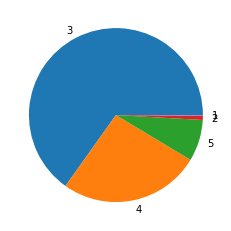

In [35]:
#obtendo informações de frequencia absoluta e relativa das condições do imóveis entre 1 a 5. sendo 1 muito ruim e 5 muito bom
df_percent_condition=df.stb.freq(['condition'])
plt.pie(x=df_percent_condition['percent'],labels=df_percent_condition.condition);


<h1>Analise Exploratória </h1>


*   Observar caracteristicas por caracteristicas das colunas:
1.   Utilizar a analise qualitativa Quantil para eliminar Outliers
*   analisar valores númericos discretos(bedrooms,bathrooms	sqft_living,sqft_lot,floors)



<h3>Grafico de heatmap</h3>
Permite analise de correlação em que:<br>


*   0.7 a 0.9 positivo ou negativo indica uma correlação forte.
*   0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
*   0.3 a 0.5 positivo ou negativo indica uma correlação fraca




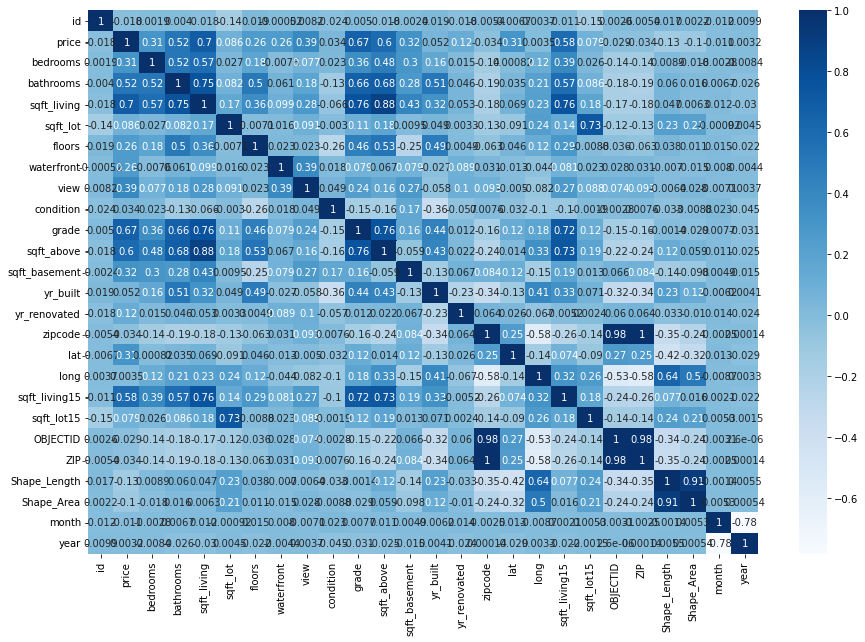

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [36]:
#funções para definição de Analise de outliers
columns=df
def limites(columns):
  q1=columns.quantile(.25)
  q3=columns.quantile(.75)
  amplitude= q3-q1
  return q1-1.5*amplitude, q3+1.5*amplitude
def diagrama_caixa(columns):
  fig,(ax1, ax2)= plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=columns, ax=ax1)
  ax2.set_xlim(limites(columns))
  sns.boxplot(x=columns, ax=ax2)
def histograma(columns):
  plt.figure(figsize=(15,5))
  sns.distplot(columns, hist=True)
def grafico_barra(columns):
  plt.figure(figsize=(15,5))
  ax=sns.barplot(x=columns.value_counts().index,y=columns.value_counts())
  ax.set_xlim(limites(columns))
def grafico_barra2(columns,columns2):
  plt.figure(figsize=(20,25))
  plt.xticks(rotation=75, fontsize=20)
  ax=sns.barplot(x=columns,y=columns2)
def grafico_caixa(column,column2):
  plt.figure(figsize=[12, 6])
  plt.subplot(122)
  plt.xticks(rotation=75, fontsize=10)
  sns.boxplot(x=column, y=column2, data=df)
  plt.show()

<h1>Price</h1>

In [37]:
df.sort_values('price',ascending=False).head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,PREFERRED_CITY,Shape_Length,Shape_Area,month,year
7840,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,...,3480,1910,1987,47.6298,-122.323,SEATTLE,37488.780791,4.322189e+07,10,2014
4219,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,...,2360,1940,2001,47.6500,-122.214,BELLEVUE,108801.063326,2.014512e+08,6,2014
10014,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,1030,2001,0,47.6305,-122.240,MEDINA,37222.726961,3.934682e+07,9,2014
4753,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,3000,2001,0,47.6289,-122.233,MEDINA,37222.726961,3.934682e+07,8,2014
1565,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,...,1280,2009,0,47.6232,-122.220,BELLEVUE,108801.063326,2.014512e+08,4,2015


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


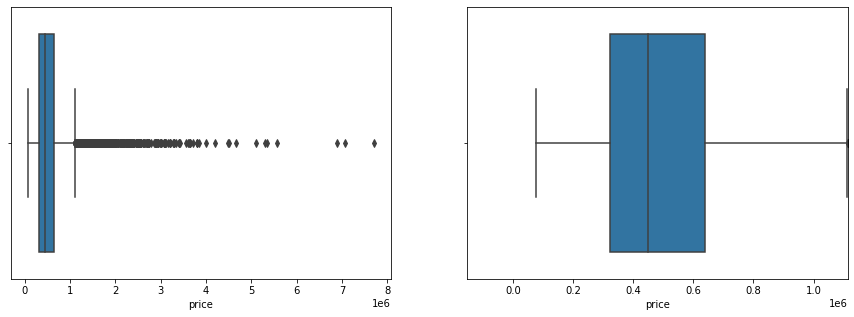

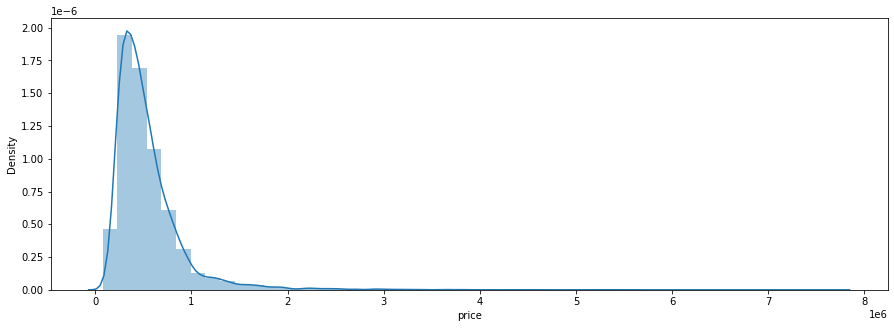

In [40]:
diagrama_caixa(df['price'])
histograma(df['price']);

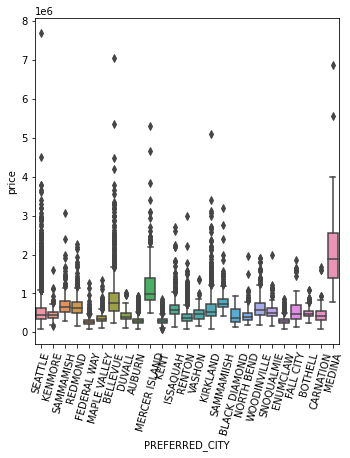

In [41]:
grafico_caixa('PREFERRED_CITY','price')

<h1>Grade</h1>
Classiﬁcação por qualidade de material utilizado na construção

In [42]:
df['grade']

0        7
1        7
2        6
3        7
4        8
        ..
23304    8
23305    8
23306    7
23307    8
23308    7
Name: grade, Length: 23309, dtype: int64

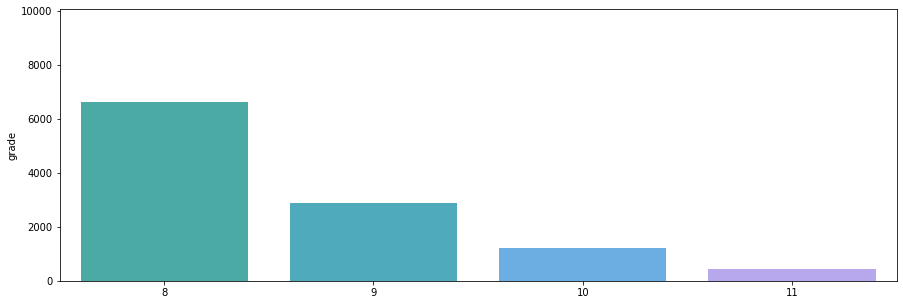

In [43]:
grafico_barra(df['grade'])

<h1>Bedrooms</h1>


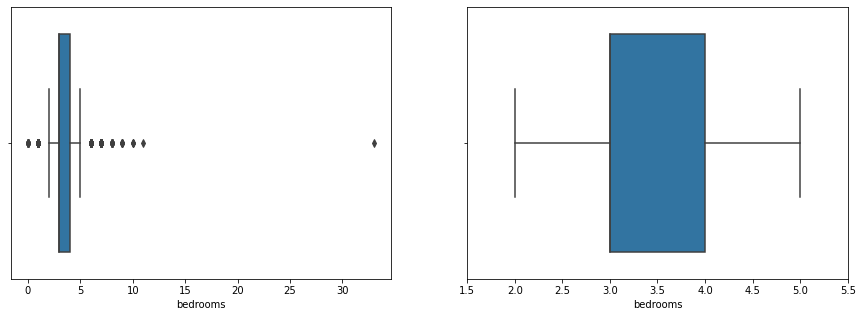

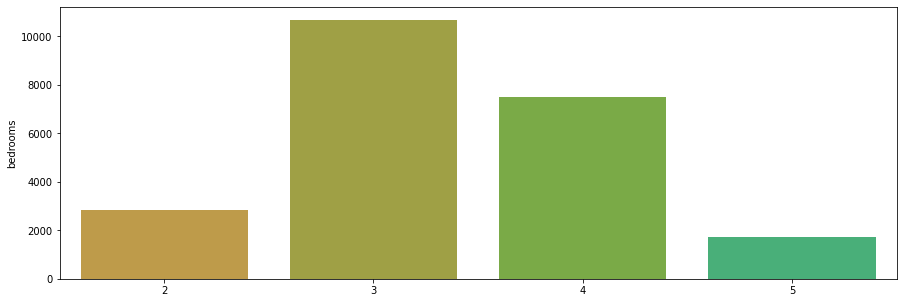

In [44]:
diagrama_caixa(df['bedrooms'])
grafico_barra(df['bedrooms'])

<h2>Visualização  do mapa</h2>





In [45]:
amostra= df.sample(n=23309)
centro_mapa={'lat':amostra.lat.mean(),'lon':amostra.long.mean()}

fig =px.density_mapbox(amostra, lat='lat',lon='long',z='price', radius=3,center=centro_mapa, zoom=8, mapbox_style='stamen-terrain')
fig.show()

In [46]:
#encontrar a cidade do imovel
df['PREFERRED_CITY'].value_counts()


SEATTLE          9232
RENTON           1597
BELLEVUE         1407
AUBURN           1263
KENT             1203
REDMOND           979
KIRKLAND          977
WOODINVILLE       942
FEDERAL WAY       779
ISSAQUAH          733
MAPLE VALLEY      590
ENUMCLAW          468
SAMMAMISH         441
BOTHELL           390
DUVALL            380
SAMMAMIISH        359
SNOQUALMIE        310
KENMORE           283
MERCER ISLAND     282
NORTH BEND        221
CARNATION         124
VASHON            118
BLACK DIAMOND     100
FALL CITY          81
MEDINA             50
Name: PREFERRED_CITY, dtype: int64

<h2>Encoding</h2>


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 23308
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           23309 non-null  float64
 1   bedrooms        23309 non-null  int64  
 2   bathrooms       23309 non-null  float64
 3   sqft_living     23309 non-null  int64  
 4   sqft_lot        23309 non-null  int64  
 5   floors          23309 non-null  float64
 6   waterfront      23309 non-null  int64  
 7   view            23309 non-null  int64  
 8   condition       23309 non-null  int64  
 9   grade           23309 non-null  int64  
 10  sqft_above      23309 non-null  int64  
 11  sqft_basement   23309 non-null  int64  
 12  yr_built        23309 non-null  int64  
 13  yr_renovated    23309 non-null  int64  
 14  lat             23309 non-null  float64
 15  long            23309 non-null  float64
 16  PREFERRED_CITY  23309 non-null  object 
 17  Shape_Length    23309 non-null 

In [48]:
df_cod=df.copy()
coluna_cidades=['PREFERRED_CITY']
df_cod=pd.get_dummies(data=df_cod, columns=coluna_cidades)
display(df_cod.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,PREFERRED_CITY_MERCER ISLAND,PREFERRED_CITY_NORTH BEND,PREFERRED_CITY_REDMOND,PREFERRED_CITY_RENTON,PREFERRED_CITY_SAMMAMIISH,PREFERRED_CITY_SAMMAMISH,PREFERRED_CITY_SEATTLE,PREFERRED_CITY_SNOQUALMIE,PREFERRED_CITY_VASHON,PREFERRED_CITY_WOODINVILLE
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,1,0,0,0,0


<h1>Modelo de previsão</h1>
*   Modelos que foram escolhidos para testar<br>
1.   Random Forest<br>
2.   Linear Regression<br>
3.   Extra Tree<br>








In [49]:
#dados de treino
def avaliar_modelo(nome_modelo,y_teste,previsao):
  r2=r2_score(y_teste, previsao)
  RSME=np.sqrt(mean_squared_error(y_teste, previsao))
  return f'Modelo{nome_modelo}:\nR2:{r2:.2%}\nRSME:{RSME:.2f}'


In [50]:
modelo_rf=RandomForestRegressor()
modelo_lr=LinearRegression()
modelo_et=ExtraTreesRegressor()

modelos={'RandomForest':modelo_rf,
         'LinearRegression':modelo_lr,
         'ExtraTree':modelo_et,
         }
y=df_cod['price']
x=df_cod.drop('price',axis=1)

<h3>Separação dos dados eem treino e teste + Treino do modelo</h3>

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=10)

for nome_modelo, modelo in modelos.items():
  #treinar
  modelo.fit(x_train,y_train)
  #test
  previsao= modelo.predict(x_test)
  print(avaliar_modelo(nome_modelo,y_test,previsao))

ModeloRandomForest:
R2:88.65%
RSME:122901.43
ModeloLinearRegression:
R2:75.43%
RSME:180805.18
ModeloExtraTree:
R2:90.13%
RSME:114581.93


<h1>Analise do melhor modelo</h1>

In [52]:
for nome_modelo, modelo in modelos.items():
  #test
  previsao= modelo.predict(x_test)
  print(avaliar_modelo(nome_modelo,y_test,previsao))

ModeloRandomForest:
R2:88.65%
RSME:122901.43
ModeloLinearRegression:
R2:75.43%
RSME:180805.18
ModeloExtraTree:
R2:90.13%
RSME:114581.93


<h3>Modelo escolhido foi o: ExtraTreesRegressor</h3>


*   Maior valor de R² e ao mesmo tempo menor valor de RSME




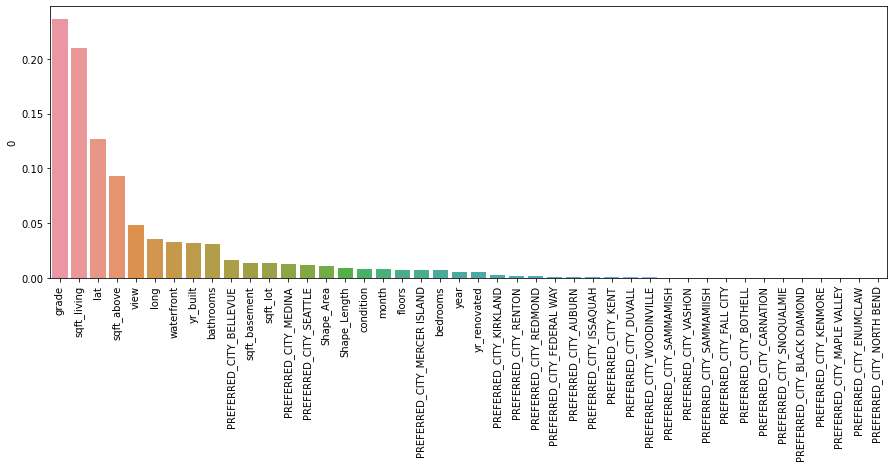

In [53]:
#Ajustando modelo de ExtraTreesRegressor
#print(modelo_et.feature_importances_)
#print(x_train.columns)
importances_features=pd.DataFrame(modelo_et.feature_importances_,x_train.columns)
importances_features=importances_features.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax=sns.barplot(x=importances_features.index, y=importances_features[0])
ax.tick_params(axis='x',rotation=90)

<h3> Análise final </h3>
Diante das analises graficas e tabelas feitas pode-se concluir, que dados. A liquidez de vendas é importante para investir e manter sustentável os investimentos da imobiliaria. imóveis que são facilmente vendidos por atender requisitos como bons materias de contrução(Grade),espaço habitável (sqft_living), as correlações mais fortes e que fazem sentido para qualidade do imóvel com grade e sqft_living tem uma relação forte de correlação 0.76 que bastante proximo do 1.0.

<h3> Sugestão de imóveis </h3>
Sugestão dos 5 melhores investimentos seriam nos seguintes imóveis:<br>1- O imóvel de id 7701960990 da cidade WOODINVILLE tem as seguintes vantagens liquidez de venda,  do dia 16-06-2014 a 19-08-2014 (aproximadamente de 2 meses), Grade:11 acima da Media de grade da cidade<br>
2- O imóvel de id 3303000130 da cidade SEATTLE tem as seguintes vantagens liquidez de venda do dia 16-01-2015 a 28-04-2015(aproximadamente 3.5 meses) com uma retabilidade de 40.54% e valor abaixo do valor da media da cidade, Grade:8 Media acima da grade da cidade<br>
3- O imóvel de id 526059224 da cidade BOTHELL tem as seguintes vantagens liquidez de venda do dia 23-09-2014 a 06-02-2015(aproximadamente 4.5 meses) com uma retabilidade de 80,77%, N° quartos:4 acima da media da cidade<br>
4- O imóvel de id 1630700361 da cidade WOODINVILLE tem as seguintes vantagens liquidez de venda do dia 27-06-2014 a 09-04-2015(aproximadamente 10 meses) com uma retabilidade de 10,09% <br> 
5- O imóvel de id 9238500040 da cidade WOODINVILLE tem as seguintes vantagens liquidez de venda do dia 24-06-2014 a 10-02-2015(aproximadamente 8 meses) com uma retabilidade de 49,75% <br>
<br>
- Quanto a não investir de jeito nenhum seriam nesses 5 imóveis devido a baixa procurar por atenderem o percentual estatiscos abaixo da media e não ter liquidez necessaria de venda para se obter lucro :<br>
id: 1523300157 2 quartos	0.75 banheiro	cidade SEATTLE<br>
id: 9324800180 2 quartos	1.5 banheiros	cidade SEATTLE<br>
id: 7853220690 3 quartos  2.5	banheiros cidade SNOQUALMIE<br>
id: 1545803980 3 quartos  1.0	banheiro	cidade MAPLE VALLEY<br>
id: 2484700015 4 quartos  1.5	banheiros cidade	SEATTLE			